# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
data_df=pd.merge(study_results, mouse_metadata, on='Mouse ID')

# Display the data table for preview
data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [3]:
# Checking the number of mice. 
data_df['Mouse ID'].describe()

count     1893
unique     249
top       g989
freq        13
Name: Mouse ID, dtype: object

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_check=data_df[data_df[["Mouse ID", "Timepoint"]].duplicated()==True]
print(duplicate_check[['Mouse ID', 'Timepoint']])


    Mouse ID  Timepoint
861     g989          0
863     g989          5
865     g989         10
867     g989         15
869     g989         20


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
#print(data_df['Mouse ID']=='g989')
duplicate_data=data_df.loc[data_df["Mouse ID"]=='g989']
duplicate_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_data=data_df.loc[data_df["Mouse ID"]!='g989']

In [7]:
# Checking the number of mice in the clean DataFrame. 
clean_data['Mouse ID'].describe()

count     1880
unique     248
top       b128
freq        10
Name: Mouse ID, dtype: object

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
drug_summary=clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

# Assemble the resulting series into a single summary DataFrame.
drug_summary_df=pd.DataFrame(drug_summary)
drug_summary_df.head()

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

drug_summary_df=pd.DataFrame(clean_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem']).rename(columns = {'mean':'Mean Tumor Volume',
                                                                                                                                                      'median':'Median Tumor Volume',
                                                                                                                                                      'var':'Tumor Volume Variance',
                                                                                                                                                      'std':'Tumor Volume Std Dev',
                                                                                                                                                      'sem':'Tumor Volume Std Err'}))

drug_summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std Dev,Tumor Volume Std Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

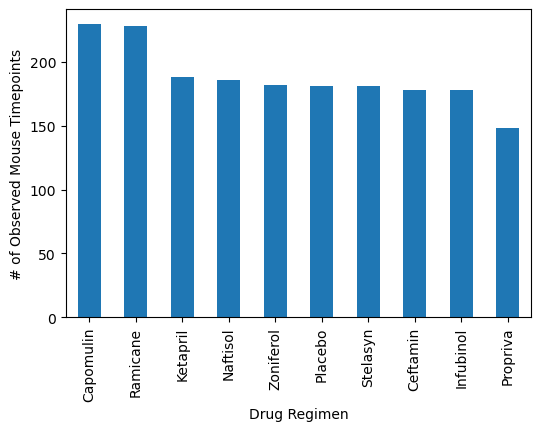

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
observations_drug = clean_data.groupby('Drug Regimen')
observations_drug_count = observations_drug['Drug Regimen'].value_counts().sort_values(ascending=False)
observations_drug_chart = observations_drug_count.plot(kind='bar', figsize=(6,4), ylabel='# of Observed Mouse Timepoints')

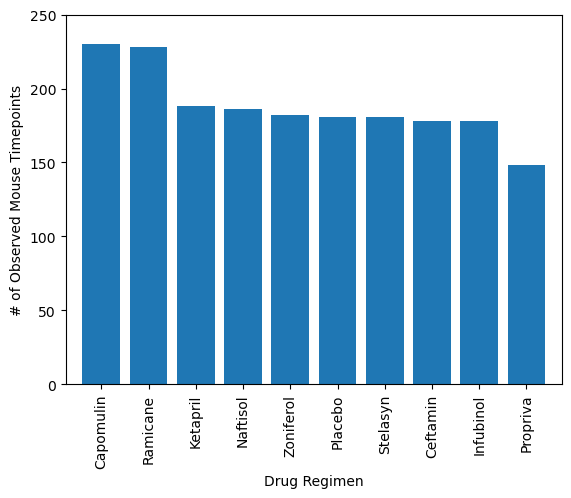

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
x = observations_drug_count.index
y = observations_drug_count
x_axis = np.arange(len(y))

plt.bar(x_axis, y, color='tab:blue', align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, x)

plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(y)+20)
plt.xticks(rotation=90)

plt.show()

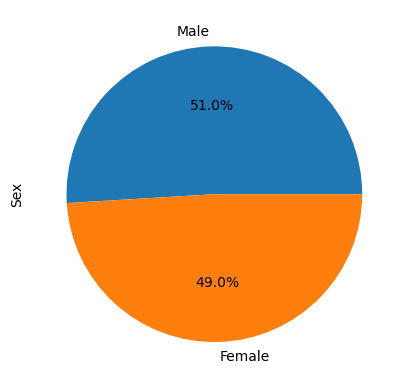

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_chart_data=pd.Series(clean_data['Sex']).value_counts()
pie_labels=['Male', 'Female']

gender_chart_data.plot(kind='pie', labels=pie_labels, autopct="%1.1f%%", ylabel='Sex')
plt.show()

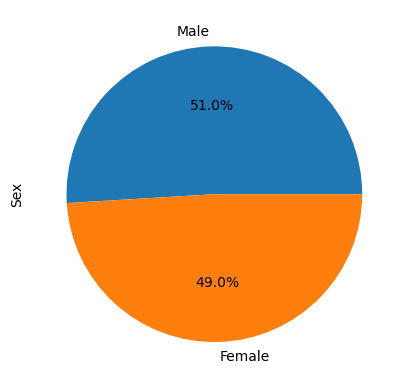

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
counts=pd.Series(clean_data['Sex']).value_counts()
gender=gender_chart_data.index

plt.pie(counts, labels=gender, autopct="%1.1f%%")
plt.ylabel('Sex')

plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

last_timepoint=clean_data.loc[(clean_data["Drug Regimen"]=='Capomulin') | 
                                (clean_data["Drug Regimen"]=='Ramicane') |
                                (clean_data["Drug Regimen"]=='Infubinol') |
                                (clean_data["Drug Regimen"]=='Ceftamin')]

# Start by getting the last (greatest) timepoint for each mouse

last_timepoint=last_timepoint.groupby('Mouse ID')['Timepoint'].max()

#max=last_timepoint['Timepoint'].max()

#max

#last_timepoint=pd.DataFrame(last_timepoint)

#last_timepoint=last_timepoint.loc[last_timepoint['Timepoint']==max]

last_timepoint.head()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


Mouse ID
a203    45
a251    45
a275    45
a411    45
a444    45
Name: Timepoint, dtype: int64

In [15]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


In [16]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

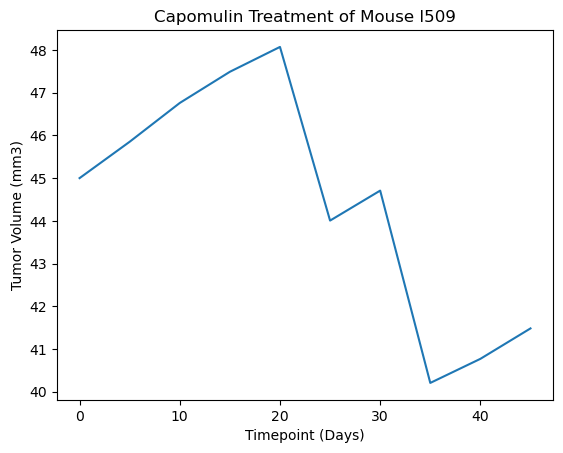

In [17]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_l509=clean_data.loc[clean_data['Mouse ID']=="l509",:]
mouse_l509_graph_data=mouse_l509[['Timepoint','Tumor Volume (mm3)']].set_index('Timepoint')

mouse_l509_graph_data.plot(legend=False, xlabel='Timepoint (Days)', ylabel='Tumor Volume (mm3)', title='Capomulin Treatment of Mouse l509')
plt.show()

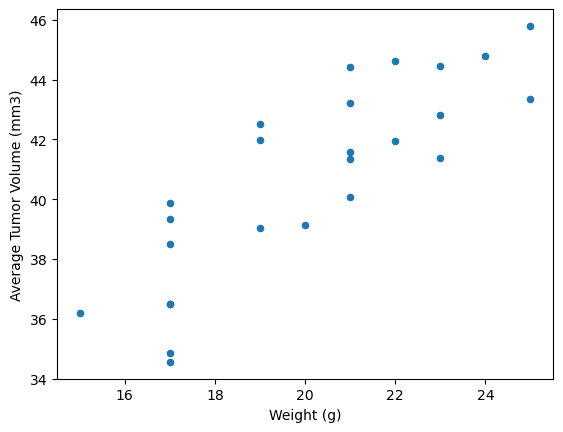

In [18]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data=clean_data.loc[clean_data['Drug Regimen']=='Capomulin',:]
grouped_data=capomulin_data.groupby('Mouse ID')[['Weight (g)','Tumor Volume (mm3)']].mean()
grouped_data.plot(kind="scatter", x='Weight (g)', y='Tumor Volume (mm3)', ylabel='Average Tumor Volume (mm3)')

plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.71


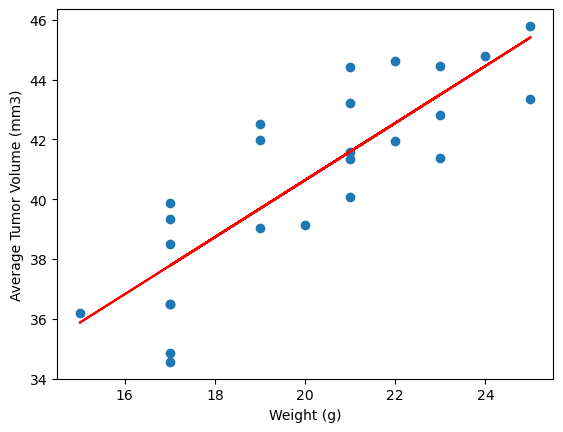

In [19]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

#R^2 SHOULD BE 0.84 CHECK!!!!!!

capomulin_data=clean_data.loc[clean_data['Drug Regimen']=='Capomulin',:]
grouped_data=capomulin_data.groupby('Mouse ID')[['Weight (g)','Tumor Volume (mm3)']].mean()

x_values=grouped_data['Weight (g)']
y_values=grouped_data['Tumor Volume (mm3)']

plt.scatter(x_values, y_values)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")
print(f"The correlation between mouse weight and the average tumor volume is {round(rvalue**2,2)}")
plt.show()
